In [64]:
import pandas as pd
import numpy as np
import plotly as py
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import seaborn as sns
from scipy.optimize import curve_fit

In [65]:
df = pd.read_csv('PSP_Example.csv')

In [66]:

vp0 = df["v_perp_0"].to_numpy()
vp1 = df["v_perp_1"].to_numpy()
vpa = df["v_para"].to_numpy()
fval = df["f(v)"].to_numpy()

# 1D case

In [ ]:
def gaussian_vdf1d(x, A, mu, sigma, c):
    return c + A * np.exp(-((x - mu)**2 / (2 * sigma**2)))

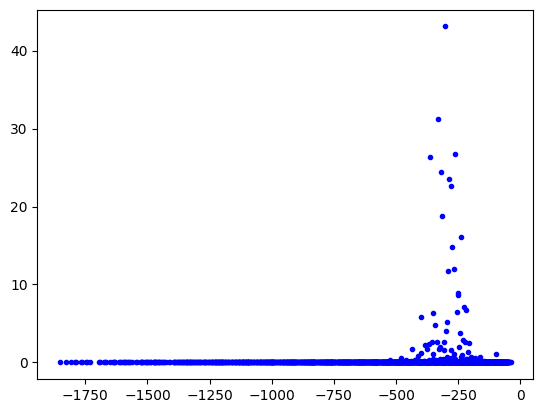

In [68]:
plt.plot(vp1, fval, 'b.', label='Data')

In [69]:

initial_guesses = [40, -250, 50, 1]

popt, pcov = curve_fit(gaussian_vdf1d, vp1, fval, p0=initial_guesses)

print("Optimal parameters (A, mu, sigma, c):")
print(popt)

Optimal parameters (A, mu, sigma, c):
[ 1.46585936e+00 -2.99433155e+02  4.49563890e+01  9.96812287e-04]


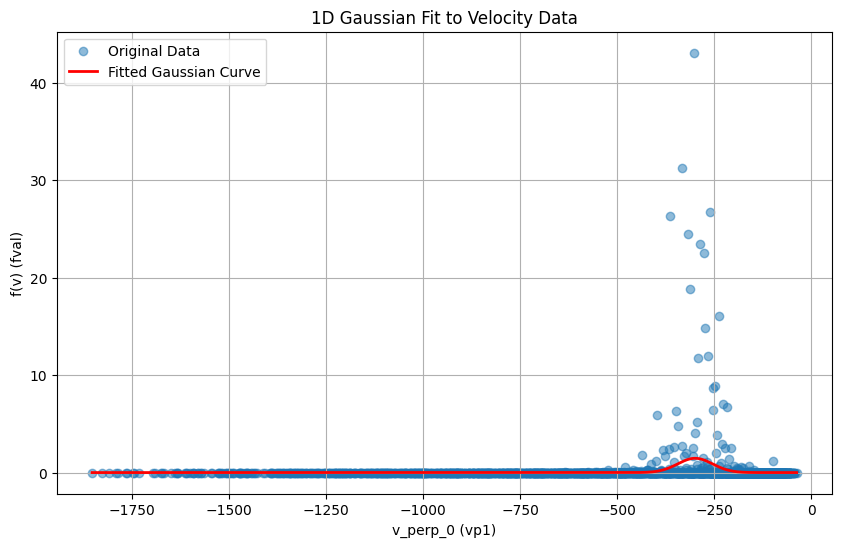

In [70]:
x_fit = np.linspace(min(vp1), max(vp1), 1000)
y_fit = gaussian_vdf1d(x_fit, *popt)

plt.figure(figsize=(10, 6))
plt.scatter(vp1, fval, label='Original Data', alpha=0.5) # Original scattered data points
plt.plot(x_fit, y_fit, color='red', lw=2, label='Fitted Gaussian Curve') # The smooth fitted line

plt.xlabel('v_perp_0 (vp1)')
plt.ylabel('f(v) (fval)')
plt.title('1D Gaussian Fit to Velocity Data')
plt.legend()
plt.grid(True)
plt.show()

In [71]:
df_nonzero = df[df["f(v)"] > 0]

In [72]:
vp0_nz = df_nonzero["v_perp_0"].to_numpy()
vp1_nz = df_nonzero["v_perp_1"].to_numpy()
vpa_nz = df_nonzero["v_para"].to_numpy()
fval_nz = df_nonzero["f(v)"].to_numpy()

In [73]:

initial_guesses = [40, -250, 50, 1]

popt, pcov = curve_fit(gaussian_vdf1d, vp1_nz, fval_nz, p0=initial_guesses)

print("Optimal parameters (A, mu, sigma, c):")
print(popt)

Optimal parameters (A, mu, sigma, c):
[ 7.30216951e+00 -2.94268257e+02  4.96788459e+01  7.97066885e-02]


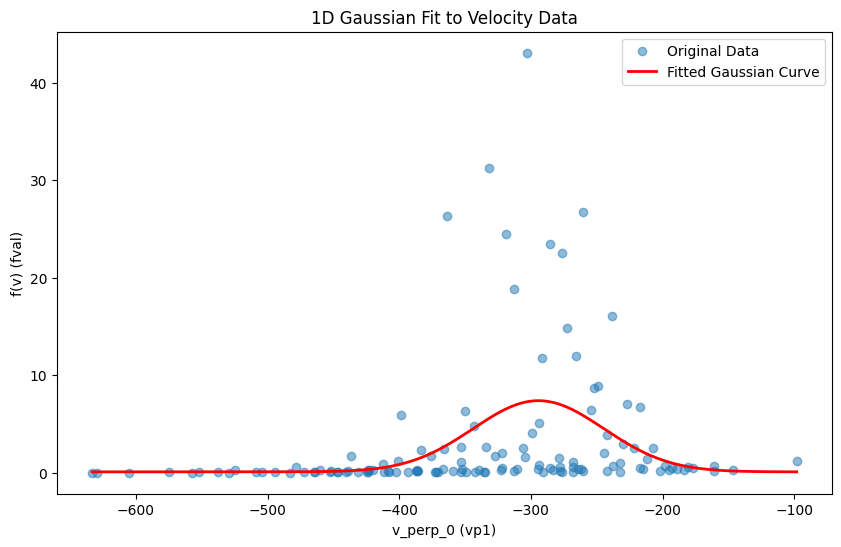

density = 909.3128801036128
bulk velocity flow = -294.2682570662208
2nd moment = 89061.79485077722


In [74]:
x_fit = np.linspace(min(vp1_nz), max(vp1_nz), 1000)
y_fit = gaussian_vdf1d(x_fit, *popt)

plt.figure(figsize=(10, 6))
plt.scatter(vp1_nz, fval_nz, label='Original Data', alpha=0.5) # Original scattered data points
plt.plot(x_fit, y_fit, color='red', lw=2, label='Fitted Gaussian Curve') # The smooth fitted line

plt.xlabel('v_perp_0 (vp1)')
plt.ylabel('f(v) (fval)')
plt.title('1D Gaussian Fit to Velocity Data')
plt.legend()
plt.show()

print("density =", popt[0] * abs(popt[2]) * np.sqrt(2 * np.pi))
print("bulk velocity flow =", popt[1])
print("2nd moment =", popt[2]**2 + popt[1]**2)

# 3D case

In [ ]:
def gaussian_vdf(X, A, mux, muy, muz, sigmax, sigmay, sigmaz, c):
    x, y, z = X
    return c + A * np.exp(-((x - mux)**2 / (2 * sigmax**2) + 
                          (y - muy)**2 / (2 * sigmay**2) + 
                          (z - muz)**2 / (2 * sigmaz**2)))

initial_guesses = [35.0, 0.0, -250.0, 250.0, 10.5, 10.5, 10.5, 0.0] 

popt, pcov = curve_fit(gaussian_vdf, (vp0, vp1, vpa), fval, p0=initial_guesses)

print("Optimal parameters (A, mux, muy, muz, sigmax, sigmay, sigmaz, c):")
print(popt)

Optimal parameters (A, mux, muy, muz, sigmax, sigmay, sigmaz, c):
[ 5.24307452e+01  1.16586064e+01 -3.06181541e+02  2.23507336e+02
  5.69349638e+01  4.59751983e+01  4.65774549e+01 -8.79280146e-04]


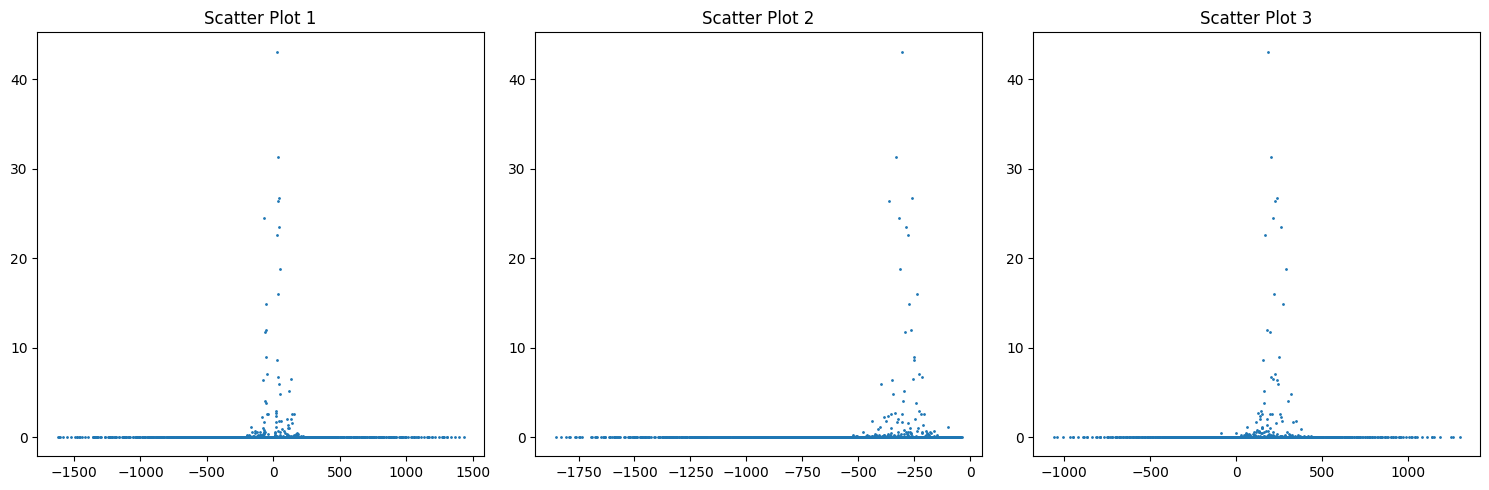

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

axes[0].scatter(vp0, fval, s=1,)
axes[0].set_title('Scatter Plot 1')

axes[1].scatter(vp1, fval, s=1,)
axes[1].set_title('Scatter Plot 2')

axes[2].scatter(vpa, fval, s=1,)
axes[2].set_title('Scatter Plot 3')

plt.tight_layout()
plt.show()

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import Axes3D # Necessary for true 3D plotting, though we use projections below
import pandas as pd # Assuming your data is in a pandas DataFrame 'df'

# --- Setup: Load Data (Assuming 'df' exists from your 1D code) ---
# df = pd.read_csv('your_data_file.csv') # Example loading
# vp0, vp1, vpa, fval = df["v_perp_0"], df["v_perp_1"], df["v_para"], df["f(v)"] 
# Using the non-zero filtered data is generally better for pure VDF fitting:
vp0, vp1, vpa, fval = vp0_nz, vp1_nz, vpa_nz, fval_nz 

# --- 1. Define the 3D Gaussian Function ---

def gaussian_vdf3d(X, A, mux, muy, muz, sigmax, sigmay, sigmaz, c):
    # X is a tuple/list of arrays: (x_data, y_data, z_data)
    x, y, z = X
    exponent = ((x - mux)**2 / (2 * sigmax**2) + 
                (y - muy)**2 / (2 * sigmay**2) + 
                (z - muz)**2 / (2 * sigmaz**2))
    return c + A * np.exp(-exponent)

Optimal parameters (A, mux, muy, muz, sigmax, sigmay, sigmaz, c):
[ 5.23691829e+01  1.15878778e+01 -3.06152717e+02  2.23484739e+02
  5.67677994e+01  4.59849396e+01  4.65881599e+01  4.81911778e-02]


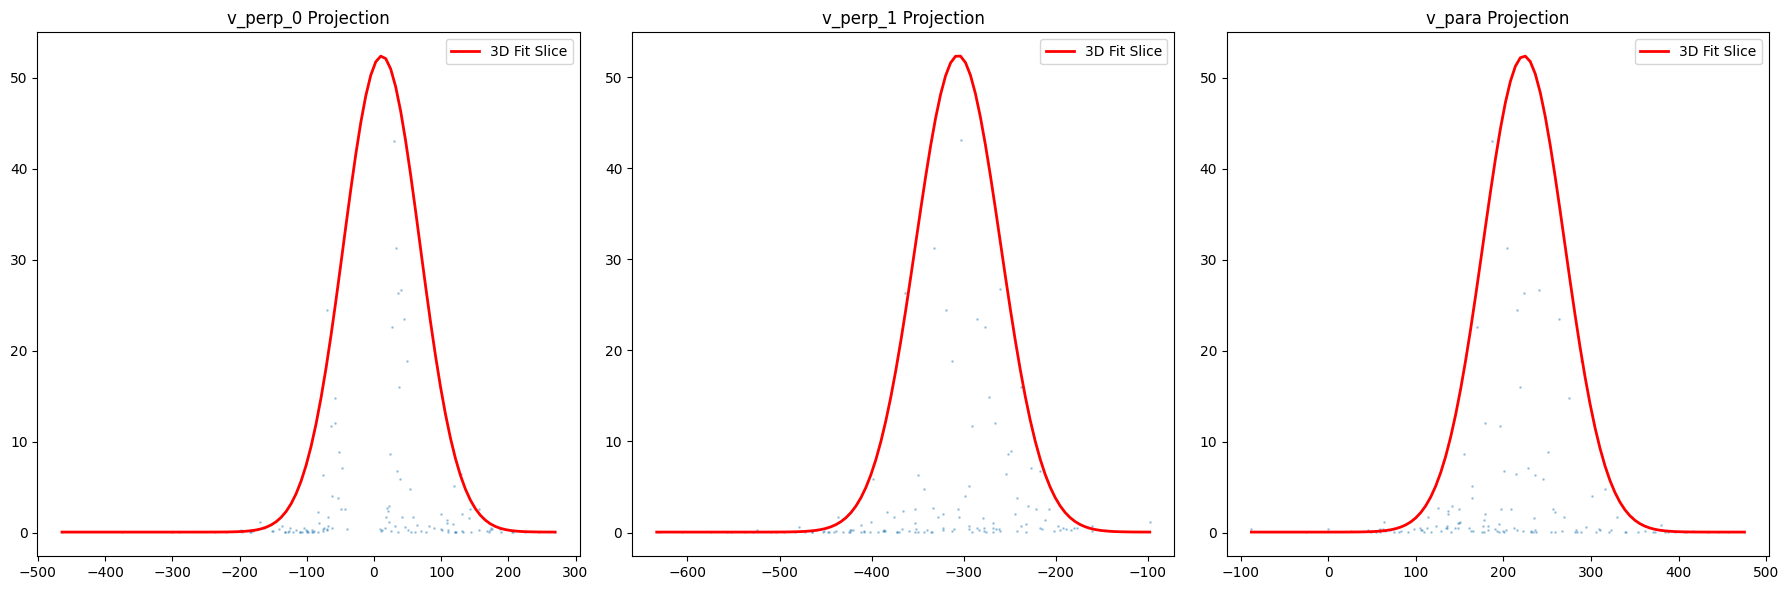


--- 3D Results ---
Density = 100308754.4521
Bulk Velocity (mux, muy, muz) = [  11.5878778  -306.15271744  223.48473934]
Total 2nd Moment (E[V^2]) = 151316.8484
Variances (sigmax^2, sigmay^2, sigmaz^2) = 3222.58, 2114.61, 2170.46


In [58]:
data_tuple = (vp0, vp1, vpa) 

initial_guesses = [35.0, 0.0, -250.0, 250.0, 10.5, 10.5, 10.5, 0.0] 

popt, pcov = curve_fit(gaussian_vdf3d, data_tuple, fval, p0=initial_guesses)

print("Optimal parameters (A, mux, muy, muz, sigmax, sigmay, sigmaz, c):")
print(popt)

# Extract optimal parameters for clarity
A_opt, mux_opt, muy_opt, muz_opt, sigmax_opt, sigmay_opt, sigmaz_opt, c_opt = popt

# --- 3. Visualize the 3D Fit Results (Projected onto 1D axes) ---

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Generate smooth fit lines for each axis using the optimal parameters
x_fit = np.linspace(min(vp0), max(vp0), 100)
y_fit = np.linspace(min(vp1), max(vp1), 100)
z_fit = np.linspace(min(vpa), max(vpa), 100)

axes[0].scatter(vp0, fval, s=1, alpha=0.3)
# The line below uses the 1D slice of the 3D function
axes[0].plot(x_fit, gaussian_vdf3d((x_fit, muy_opt * np.ones_like(x_fit), muz_opt * np.ones_like(x_fit)), *popt), color='red', lw=2, label='3D Fit Slice')
axes[0].set_title('v_perp_0 Projection')
axes[0].legend()

axes[1].scatter(vp1, fval, s=1, alpha=0.3)
axes[1].plot(y_fit, gaussian_vdf3d((mux_opt * np.ones_like(y_fit), y_fit, muz_opt * np.ones_like(y_fit)), *popt), color='red', lw=2, label='3D Fit Slice')
axes[1].set_title('v_perp_1 Projection')
axes[1].legend()

axes[2].scatter(vpa, fval, s=1, alpha=0.3)
axes[2].plot(z_fit, gaussian_vdf3d((mux_opt * np.ones_like(z_fit), muy_opt * np.ones_like(z_fit), z_fit), *popt), color='red', lw=2, label='3D Fit Slice')
axes[2].set_title('v_para Projection')
axes[2].legend()

plt.tight_layout()

plt.show()


# --- 4. Calculate 3D Moments and Density ---

# Density (requires integrating the 3D function)
# For a 3D Gaussian, the normalization factor involves (2*pi)^(3/2)
density = popt[0] * abs(popt[4] * popt[5] * popt[6]) * ((2 * np.pi)**1.5)

# Bulk Velocity Vector (1st moment vector)
bulk_velocity = np.array([mux_opt, muy_opt, muz_opt])

# Second Moment calculation
# The second moment E[V^2] for an isotropic or anisotropic Gaussian
# is the sum of variances plus the sum of squared means.

second_moment_x = sigmax_opt**2 + mux_opt**2
second_moment_y = sigmay_opt**2 + muy_opt**2
second_moment_z = sigmaz_opt**2 + muz_opt**2

# Total second moment E[V_x^2 + V_y^2 + V_z^2]
total_second_moment = second_moment_x + second_moment_y + second_moment_z
print("\n--- 3D Results ---")
print(f"Density = {density:.4f}")
print(f"Bulk Velocity (mux, muy, muz) = {bulk_velocity}")
print(f"Total 2nd Moment (E[V^2]) = {total_second_moment:.4f}")
print(f"Variances (sigmax^2, sigmay^2, sigmaz^2) = {sigmax_opt**2:.2f}, {sigmay_opt**2:.2f}, {sigmaz_opt**2:.2f}")